In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
dataset = pd.read_csv('/content/vgsales.csv')
# our dataset in this implementation is small, and thus we can print it all instead of viewing only the end
print(dataset)


        Rank                                              Name  Year  \
0          1                                        Wii Sports  2006   
1          2                                 Super Mario Bros.  1985   
2          3                                    Mario Kart Wii  2008   
3          4                                 Wii Sports Resort  2009   
4          5                          Pokemon Red/Pokemon Blue  1996   
...      ...                                               ...   ...   
16593  16596                Woody Woodpecker in Crazy Castle 5  2002   
16594  16597                     Men in Black II: Alien Escape  2003   
16595  16598  SCORE International Baja 1000: The Official Game  2008   
16596  16599                                        Know How 2  2010   
16597  16600                                  Spirits & Spells  2003   

              Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0            Sports     41.49     29.02      3.77       

In [45]:
# split the data into featutes and target variable seperately
X_l = dataset.iloc[:, -7].values # features set
y_p = dataset.iloc[:, -1].values # set of study variable

In [46]:
print(X_l)
print(y_p)

[2006 1985 2008 ... 2008 2010 2003]
[8.274e+01 4.024e+01 3.582e+01 ... 1.000e-02 1.000e-02 1.000e-02]


In [47]:
y_p = y_p.reshape(-1,1)
print(y_p)
X_p=X_l.reshape(-1,1)
print(X_p)

[[8.274e+01]
 [4.024e+01]
 [3.582e+01]
 ...
 [1.000e-02]
 [1.000e-02]
 [1.000e-02]]
[[2006]
 [1985]
 [2008]
 ...
 [2008]
 [2010]
 [2003]]


In [48]:
from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
X_p = StdS_X.fit_transform(X_p)
y_p = StdS_y.fit_transform(y_p)


In [49]:
print("Scaled X_p:")
print(X_p)
print("Scaled y_p:")
print(y_p)

Scaled X_p:
[[-0.07197676]
 [-3.70424462]
 [ 0.27395352]
 ...
 [ 0.27395352]
 [ 0.61988379]
 [-0.59087217]]
Scaled y_p:
[[52.86402505]
 [25.53250298]
 [22.69002469]
 ...
 [-0.33919426]
 [-0.33919426]
 [-0.33919426]]


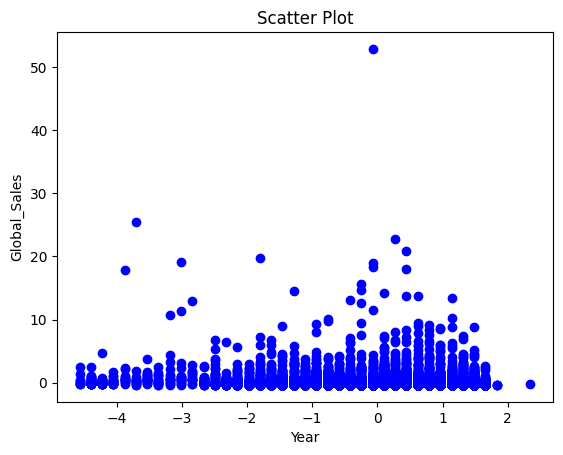

In [50]:
plt.scatter(X_p, y_p, color = 'blue') # plotting the training set
plt.title('Scatter Plot') # adding a tittle to our plot
plt.xlabel('Year') # adds a label to the x-axis
plt.ylabel('Global_Sales') # adds a label to the y-axis
plt.show() # prints

In [51]:
# import the model
from sklearn.svm import SVR
# create the model object
regressor = SVR(kernel = 'rbf')
# fit the model on the data
regressor.fit(X_p, y_p)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [54]:
A=regressor.predict(StdS_X.transform([[6.5]]))
print(A)
A = A.reshape(-1,1)

[-0.01370785]


In [55]:
# Taking the inverse of the scaled value
A_pred = StdS_y.inverse_transform(A)
print(A_pred)

[[0.51612521]]


In [58]:
B_pred = StdS_y.inverse_transform(regressor.predict(StdS_X.transform([[6.5]])).reshape(-1,1))
print(B_pred)

[[0.51612521]]


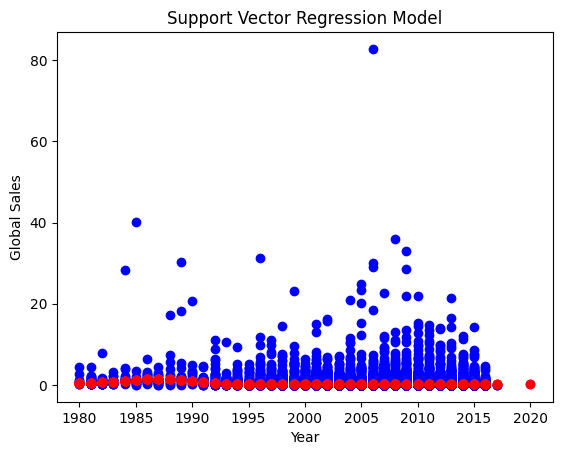

In [59]:
# inverse the transformation to go back to the initial scale
plt.scatter(StdS_X.inverse_transform(X_p), StdS_y.inverse_transform(y_p), color = 'blue')
plt.scatter(StdS_X.inverse_transform(X_p), StdS_y.inverse_transform(regressor.predict(X_p).reshape(-1,1)), color = 'red')
# add the title to the plot
plt.title('Support Vector Regression Model')
# label x axis
plt.xlabel('Year')
# label y axis
plt.ylabel('Global Sales')
# print the plot
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
X_p_train,X_p_test,y_p_train,y_p_test=train_test_split(X_p,y_p,test_size=0.3,random_state=2529)
X_p_train.shape,X_p_test.shape,y_p_train.shape,y_p_test.shape

((11618, 1), (4980, 1), (11618, 1), (4980, 1))

In [61]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error
reg_all=SVR()
reg_all.fit(X_p_train,y_p_train)
y_p_pred=reg_all.predict(X_p_test)
Rsquare=reg_all.score(X_p_test,y_p_test)
print("Rsquare: %f" %(Rsquare))
print("Intercept: %f" %(reg_all.intercept_))
mse=mean_squared_error(y_p_test,y_p_pred)
print("mse: %f" %(mse))
mae = mean_absolute_error(y_p_test,y_p_pred)
print("mae: %f" %(mae))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Rsquare: -0.013648
Intercept: -0.024773
mse: 1.019002
mae: 0.295377
